In [4]:
using Pkg
Pkg.add("Distributions")
Pkg.add("Mosek")
Pkg.add("JuMP")
Pkg.add("LinearAlgebra")
Pkg.add("MultivariatePolynomials")
Pkg.add("PolyJuMP")
Pkg.add("SumOfSquares")
Pkg.add("DynamicPolynomials")
Pkg.build("Mosek")
Pkg.add("DataStructures")
Pkg.add("Optim")
using Distributions
using LinearAlgebra
using MultivariatePolynomials
using JuMP
using PolyJuMP
using SumOfSquares
using DynamicPolynomials
using Mosek
using DataStructures
using Optim


  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 % Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.to

┌ Info: Recompiling stale cache file /Users/elviramorenof/.julia/compiled/v1.0/Mosek/vS2ln.ji for Mosek [6405355b-0ac2-5fba-af84-adbd65488c0e]
└ @ Base loading.jl:1187


In [5]:
Pkg.add("PyPlot")
using PyPlot
Pkg.add("Contour")
using Contour



 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]


We demonstrate that the switched linear system associated to the matrix set

$
\begin{equation}
\mathcal{A}=\left\{ A_1:=\begin{pmatrix} 0.9 & 1\\ 0 & -0.7 \end{pmatrix}, A_2:=\begin{pmatrix} 0.2&0\\0.3&-0.8\end{pmatrix} \right\}
\end{equation}$

is asymptotically stable. We solve the SDP:

$
\begin{equation}
    \begin{aligned}
    &f(x)-(x_1^2+x_2^2)^{d/2} \quad \text{sos-convex}\\
    &f(x)-f(A_ix)- (x_1^2+x_2^2)^{d/2}  \; \text{sos, for } i=1,2.
\end{aligned}
\end{equation}
$

In [66]:
A=[0.9 1; 0 -0.7]
B=[0.2 0; 0.3 -0.8]


#Number of variables (of the polynomial)
n=2
#1/2 degree of the polynomial
d=1


#We generate the variables x_1,...,x_n and the vector of monomials of degree 2d
@polyvar x[1:n]
M=monomials(x,2*d)

############################## Optimization model

m = SOSModel(solver = MosekSolver())

#Model Variables
@variable m V Poly(M)
@variable(m,c)

#Model Constraints 

s=sum(map(z->z^2,x))
q=V-s^d

@SDconstraint m differentiate(q,x,2)>=0
@constraint m q-V(x=>A*x)>=0
@constraint m q-V(x=>B*x)>=0
@constraint m V>=c
@constraint m c>=0

#Objective function

@objective(m,Max,c)

status =  solve(m)

FO = getvalue(c)
sol=getvalue(V)




Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 45              
  Cones                  : 0               
  Scalar variables       : 6               
  Matrix variables       : 4               
  Integer variables      : 0               

Optimizer started.
Presolve started.
Linear dependency checker started.
Linear dependency checker terminated.
Eliminator - tries                  : 0                 time                   : 0.00            
Lin. dep.  - tries                  : 1                 time                   : 0.00            
Lin. dep.  - number                 : 0               
Presolve terminated. Time: 0.00    
Problem
  Name                   :                 
  Objective sense        : min             
  Type                   : CONIC (conic optimization problem)
  Constraints            : 45              
  Cones               

21.754492977931104x₁⁴ + 51.27592292103401x₁³x₂ + 116.11141686764522x₁²x₂² + 28.119949181156787x₁x₂³ + 66.17567985153369x₂⁴

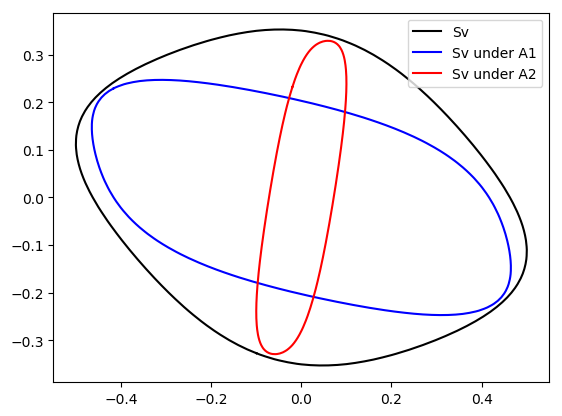

In [69]:
x_m = -1:0.01:1
y_m = -1:0.01:1


z1 = [convert(Float64,subs(sol,x =>[xi;yi])) for xi in x_m, yi in y_m]


for cl in levels(contours(x_m,y_m,z1,[1]))
    lvl = level(cl) 
    for line in lines(cl)
        xs, ys = coordinates(line) 
        S = zeros(2, length(xs))
        S[1,:]=xs
        S[2,:]=ys
        DA=A*S
        DB=B*S
        plot(xs, ys ,color = :black, label="Sv")
        plot(DA[1,:], DA[2,:] ,color = :blue, label="Sv under A1")
        plot(DB[1,:], DB[2,:] ,color = :red, label="Sv under A2")
    end
end


legend(loc = "upper right", fontsize=10);
